In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
s=pd.read_csv('C:\\Users\\Admin\\Desktop\\DataScience\\Datasets\\Shampoo.csv')
s.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [14]:
type(s)

pandas.core.frame.DataFrame

In [15]:
sh=pd.read_csv('C:\\Users\\Admin\\Desktop\\DataScience\\Datasets\\Shampoo.csv',index_col=[0],parse_dates=True,squeeze=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25552\3443017058.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sh=pd.read_csv('C:\\Users\\Admin\\Desktop\\DataScience\\Datasets\\Shampoo.csv',index_col=[0],parse_dates=True,squeeze=True)


In [16]:
type(sh)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

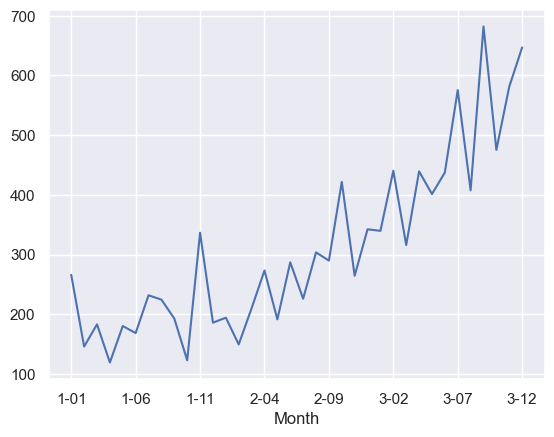

In [17]:
sh.plot()

<AxesSubplot:xlabel='Month'>

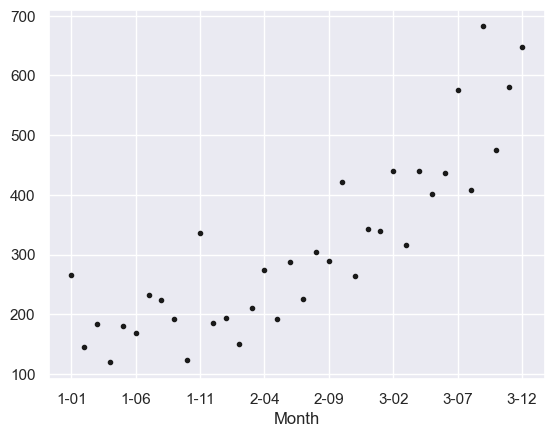

In [18]:
sh.plot(style='k.')

In [19]:
sh.size

36

In [20]:
sh.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [21]:
sh_ma=sh.rolling(window=10).mean()

Wall time: 69.3 ms


<AxesSubplot:xlabel='Month'>

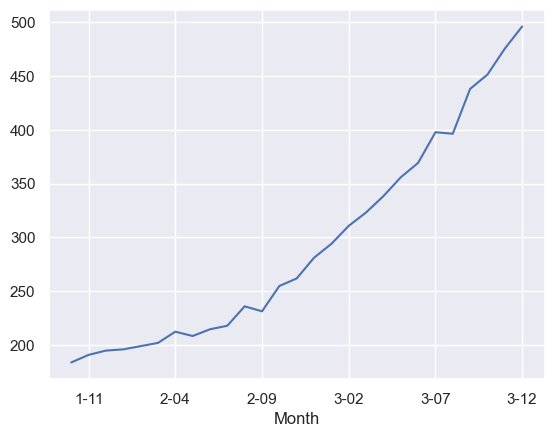

In [23]:
%%time
sh_ma.plot()

In [24]:
%%time
sh

Wall time: 0 ns


Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

In [25]:
sh_base=pd.concat([sh,sh.shift(1)],axis=1)

In [26]:
sh_base

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [27]:
sh_base.columns

Index(['Sales', 'Sales'], dtype='object')

In [28]:
sh_base.columns=['Actual_sales','forecast_sales']

In [29]:
sh_base.head()

,Actual_sales,forecast_sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [32]:
sh_base.dropna(inplace=True)

In [33]:
sh_base.head()

,Actual_sales,forecast_sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [36]:
from sklearn.metrics import mean_squared_error
sh_error=mean_squared_error(sh_base.Actual_sales,sh_base.forecast_sales)

In [37]:
sh_error

11715.388285714285

In [39]:
import numpy as np
np.sqrt(sh_error)

108.23764726616282

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

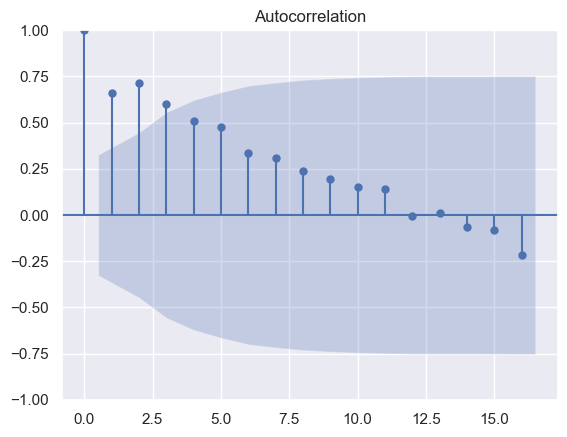

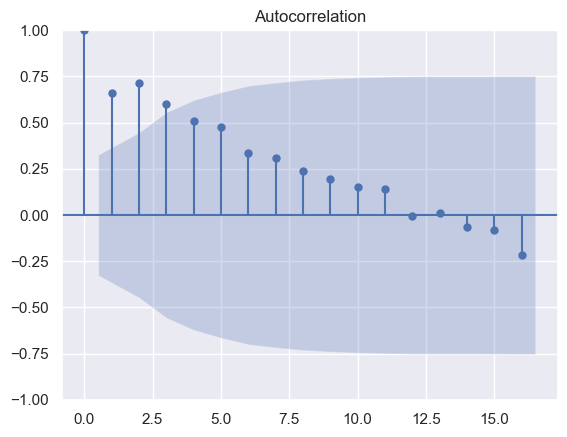

In [41]:
plot_acf(sh)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 76.6 ms


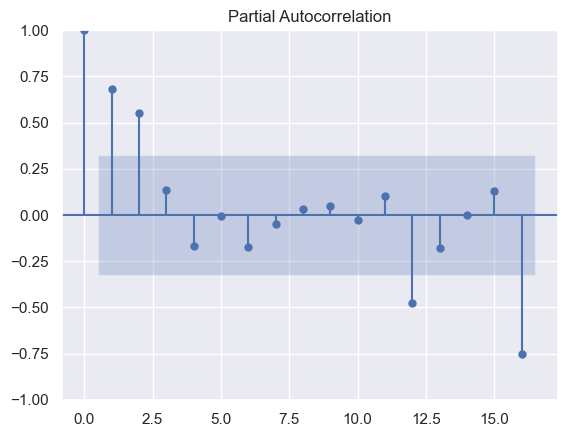

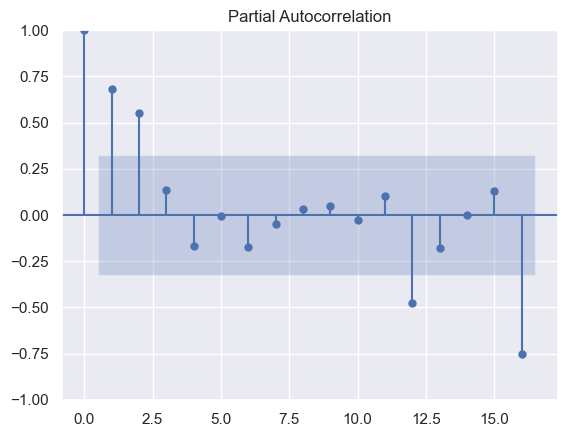

In [42]:
%%time
plot_pacf(sh)

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
sh_train=sh[0:25]
sh_test=sh[25:36]

In [57]:
sh_model=ARIMA(sh_train,order=(3,1,2))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [58]:
sh_model_fit=sh_model.fit